 # **Breast Cancer Wisconsin (Diagnostic) Data Set**

## *Predict whether the cancer is benign or malignant*

### 02123049 / 이원준 / ETRI

### 기계학습 

![](https://miro.medium.com/max/1400/1*pxFCmhRFTighUn88baLcSA.png)

## Attribute Information:

---

* 1) ID number
* 2) Diagnosis (M = malignant, B = benign)
* 3-32)

Ten real-valued features are computed for each cell nucleus:

* a) radius (mean of distances from center to points on the perimeter)
* b) texture (standard deviation of gray-scale values)
* c) perimeter
* d) area
* e) smoothness (local variation in radius lengths)
* f) compactness (perimeter^2 / area - 1.0)
* g) concavity (severity of concave portions of the contour)
* h) concave points (number of concave portions of the contour)
* i) symmetry
* j) fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three
largest values) of these features were computed for each image,
resulting in 30 features. For instance, field 3 is Mean Radius, field
13 is Radius SE, field 23 is Worst Radius.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Importing Libraries

---

In [ ]:
#필수 라이브러리 
import os
import numpy as np
import pandas as pd
import missingno as msno

#시각화 
import matplotlib.pyplot as plt
import seaborn as sns

# 전처리 및 평가
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, plot_confusion_matrix

# 학습 모델 구축 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

import warnings
warnings.filterwarnings('ignore')

In [ ]:
base_dir = '/content/drive/MyDrive/ML219/wisconsin_data.csv'

In [ ]:
df = pd.read_csv(base_dir)

# 데이터 살펴보기 


---

In [ ]:
df.head().T

,0,1,2,3,4
id,842302,842517,84300903,84348301,84358402
diagnosis,M,M,M,M,M
radius_mean,17.99,20.57,19.69,11.42,20.29
texture_mean,10.38,17.77,21.25,20.38,14.34
perimeter_mean,122.8,132.9,130,77.58,135.1
area_mean,1001,1326,1203,386.1,1297
smoothness_mean,0.1184,0.08474,0.1096,0.1425,0.1003
compactness_mean,0.2776,0.07864,0.1599,0.2839,0.1328
concavity_mean,0.3001,0.0869,0.1974,0.2414,0.198
concave points_mean,0.1471,0.07017,0.1279,0.1052,0.1043


In [ ]:
df.shape

(569, 33)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

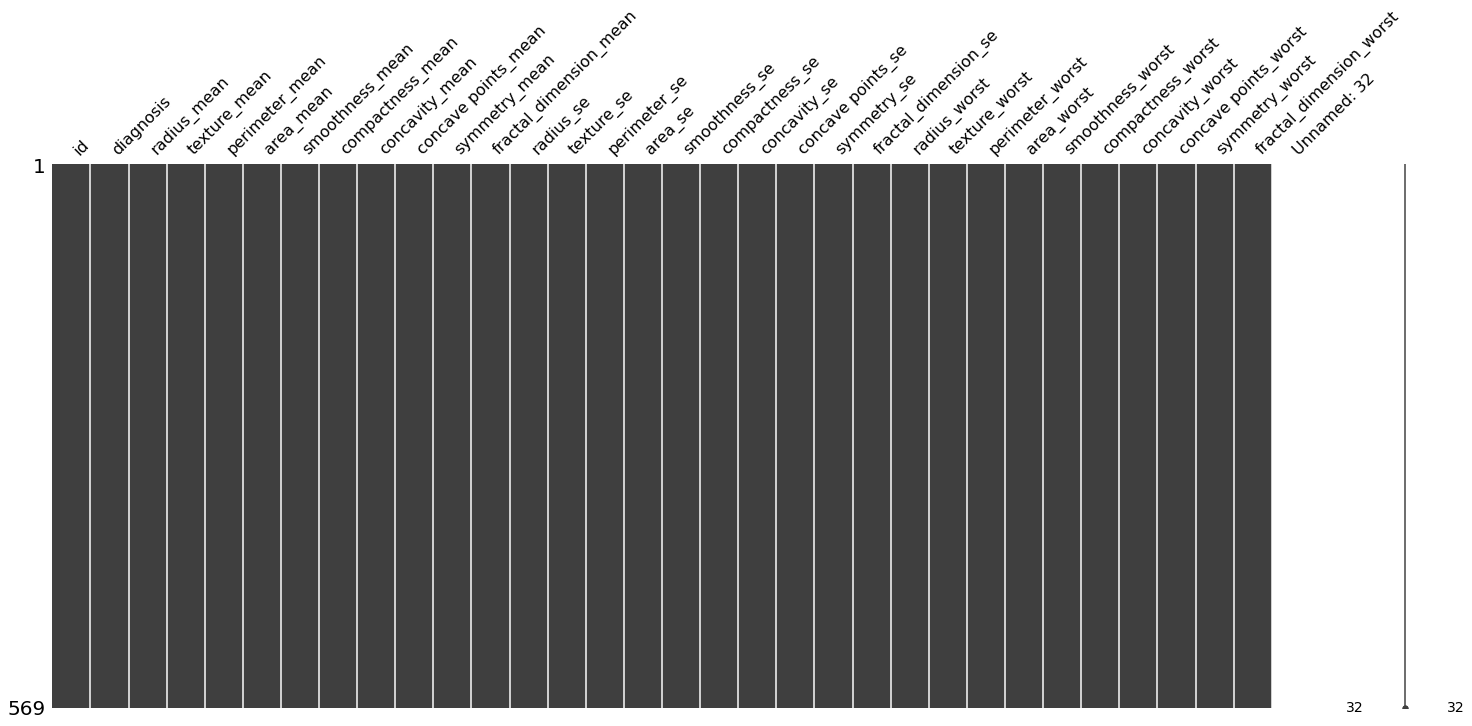

In [ ]:
# Null 값 확인 

msno.matrix(df);

In [ ]:
# 불필요 변수 드롭

df = df.drop(["id", "Unnamed: 32"], axis=1)

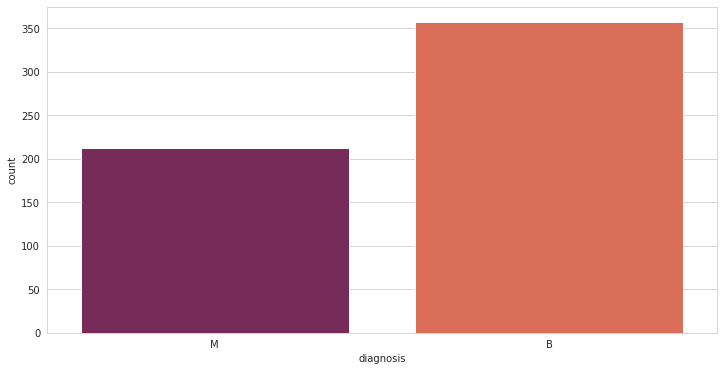

In [ ]:
sns.set_style('whitegrid')
plt.figure(figsize=(12,6))
sns.countplot(x="diagnosis", data=df, palette='rocket');

In [ ]:
fields = ["mean", "se", "worst"]
columns = ["radius", "texture", "perimeter", "area", "smoothness", "compactness", "concavity", "concave points", "symmetry", "fractal_dimension"]

# 데이터 분포 알아보기 
---

https://newly0513.tistory.com/141

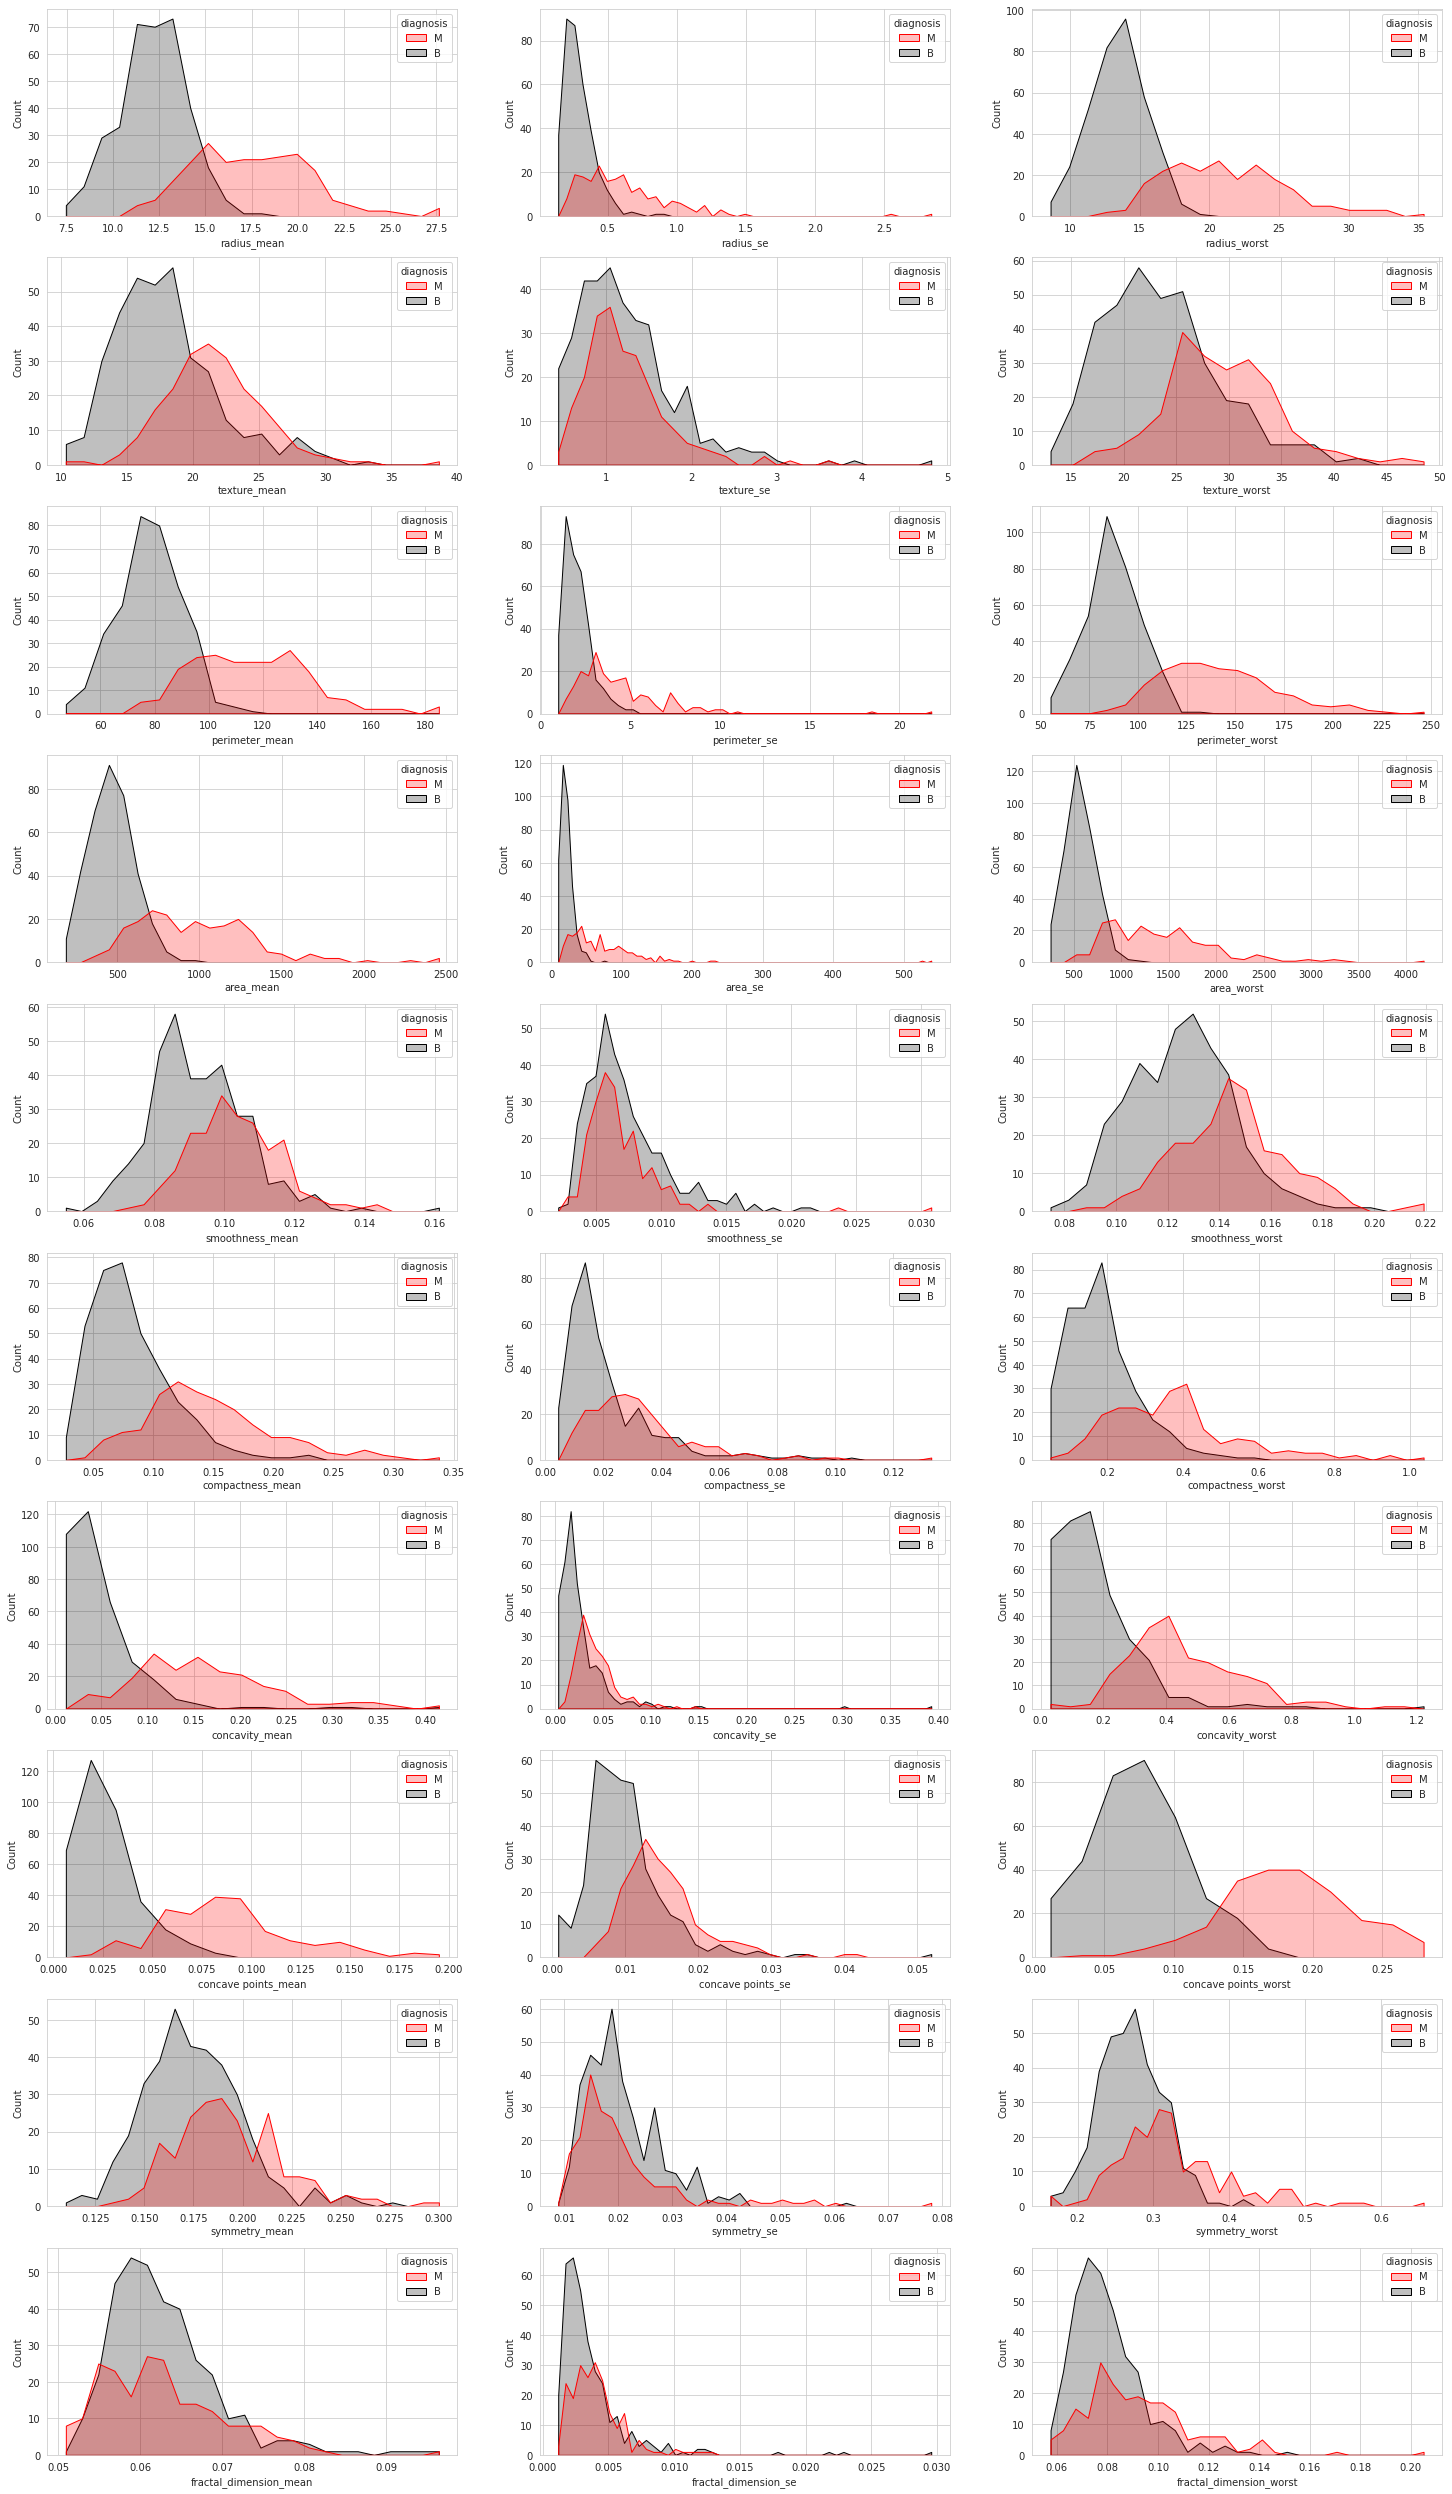

In [ ]:
fig, axs = plt.subplots(10,3, figsize=(25,45))

for col in range(len(columns)):
    
    for f in range(len(fields)):
        
        sns.histplot(df, 
                     x=columns[col]+"_"+fields[f], 
                     hue="diagnosis", element="poly", 
                     stat="count", 
                     palette=["red", "black"],
                     ax=axs[col][f])


각 변수별로 분포를 알아보기 위해 시각화

관련 변수가 연속형 데이터이기에 -  histo

위 그림을 통해 우리는 양성과 악성 종양을 구분할 수 있는 특성을 알 수 있습니다. 
아래에는 그런 특성들의 목록입니다.

radius_mean
texture_mean
perimeter_mean
area_mean
radius_worst
texture_worst
perimeter_worst
area_worst

그러나 양성과 악성을 전혀 구분할 수 없는 특성들도 있습니다. 다음과 같은 특성은 두 가지 종양에서 차이가 나타나지 않습니다.

compactness_se
concavity_se
concave_points_se
simmetry_se
smoothness_se

또한 대체로 정규분포를 그리고 있지만 그러지 않은 특성 또한 존재, 그래서 이후 정규화 

# Relationship Between Features & Features

---

### With heatmaps, we can see correlation between this columns:
---

* *perimeter - radius*
* *area - radius*
* *area - perimeter*
* *concavity - compactness*
* *fractal_dimension - compactness*
* *concave points - compactness*
* *concave points - concavity*
* *concave points - radius*
* *concave points - perimeter*
* *concave points - area*

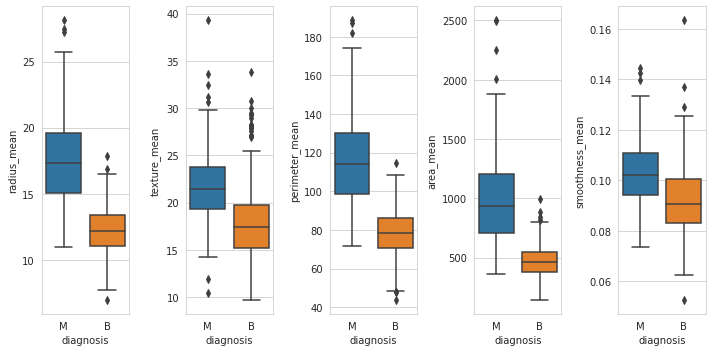

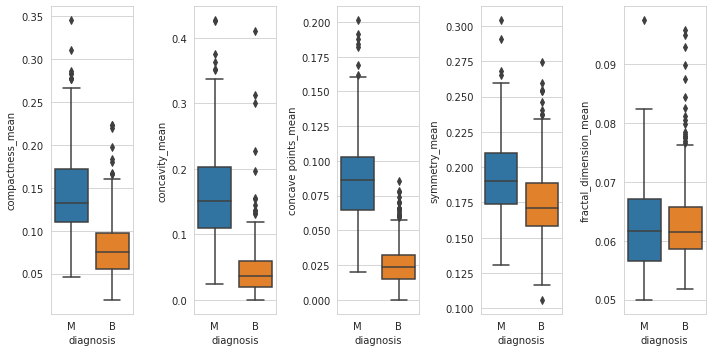

In [ ]:
plt.rcParams['figure.figsize']=(10,5)
f,(ax1,ax2,ax3,ax4,ax5) = plt.subplots(1,5)
sns.boxplot('diagnosis',y='radius_mean',data=df,ax=ax1)
sns.boxplot('diagnosis',y='texture_mean',data=df,ax=ax2)
sns.boxplot('diagnosis',y='perimeter_mean',data=df,ax=ax3)
sns.boxplot('diagnosis',y='area_mean',data=df,ax=ax4)
sns.boxplot('diagnosis',y='smoothness_mean',data=df,ax=ax5)
f.tight_layout()

f,(ax1,ax2,ax3,ax4,ax5) = plt.subplots(1,5)
sns.boxplot('diagnosis',y='compactness_mean',data=df,ax=ax1)
sns.boxplot('diagnosis',y='concavity_mean',data=df,ax=ax2)
sns.boxplot('diagnosis',y='concave points_mean',data=df,ax=ax3)
sns.boxplot('diagnosis',y='symmetry_mean',data=df,ax=ax4)
sns.boxplot('diagnosis',y='fractal_dimension_mean',data=df,ax=ax5)
f.tight_layout()


# Preprocessing

---

In [ ]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### From Outliers to Mean

---

*We can transform outlier to the mean of each column for better modeling*

https://hong-yp-ml-records.tistory.com/15
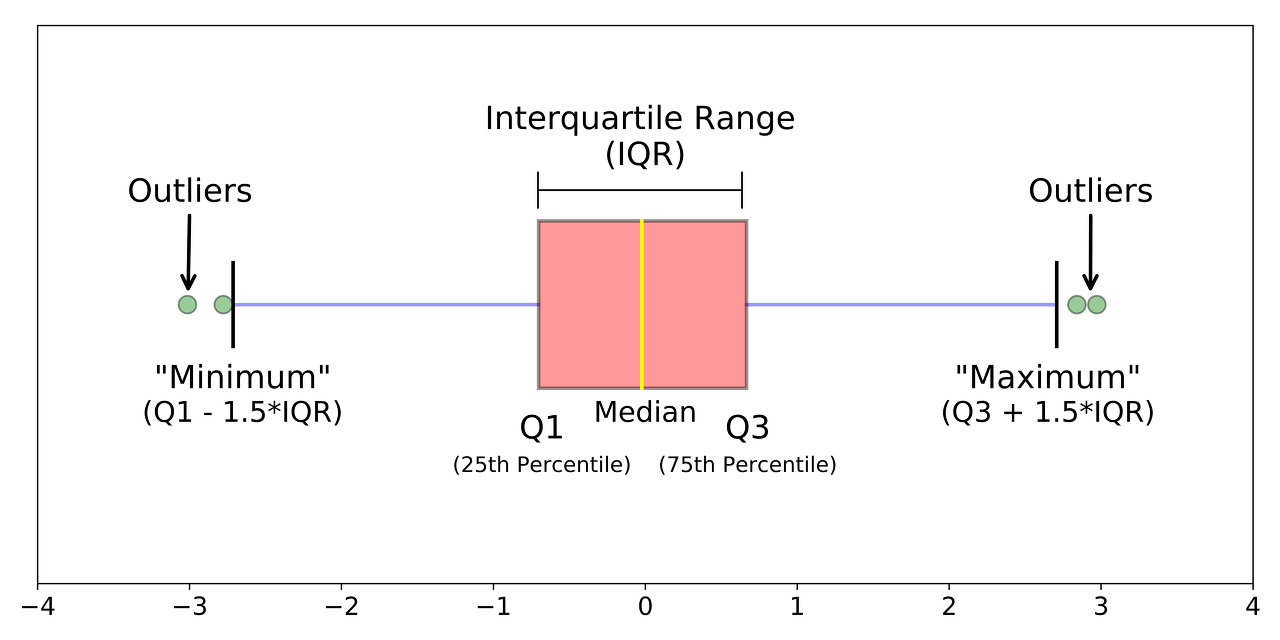

IQR이란, Interquartile range의 약자로써 Q3 - Q1를 의미한다.

# Q3 - Q1: 사분위수의 상위 75% 지점의 값과 하위 25% 지점의 값 차이

 

IQR은 Box Plot의 기본이 되는 수치라고 말할 수 있다. 


박스안의 노란줄이 Median 즉, 중앙값을 의미하며 박스의 왼쪽과 오른쪽 변이 Q1(25 퍼센타일), Q3(75 퍼센타일)

를 의미한다.

 

위에서 설명했던 바와 같이 Q3 - Q1이 IQR이 되며, Q1에서 1.5 * IQR을 한 값을 빼준 값을 최소 제한선, Q3에서 

1.5 * IQR을 더해준 값을 최대 제한선으로 둔다.

 

그 밑, 또한 그것을 넘어가는 값들을 이상치라고 말할 수 있다. 

 

이러한 IQR을 이용하여 이상치를 탐색해내는 방법으로 코드로 표현해본다.



출처: https://hong-yp-ml-records.tistory.com/15 [HONG YP's Data Science BLOG]

In [ ]:
for col in range(len(columns)):
    
    for f in range(len(fields)):
        
        Q1 = df[columns[col]+"_"+fields[f]].quantile(0.25)
        Q3 = df[columns[col]+"_"+fields[f]].quantile(0.75)
        IQR = Q3 - Q1
        
        lower_bound = Q1 - 1.5*IQR
        upper_bound = Q3 + 1.5*IQR
        
        outliers = (df[columns[col]+"_"+fields[f]] < lower_bound) | (df[columns[col]+"_"+fields[f]] > upper_bound)
        df[columns[col]+"_"+fields[f]][outliers] = df[columns[col]+"_"+fields[f]].mean()

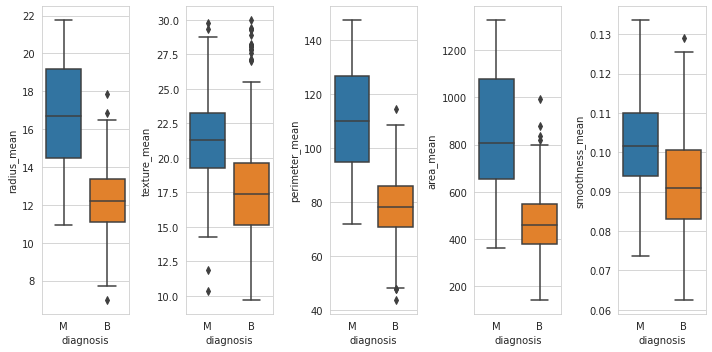

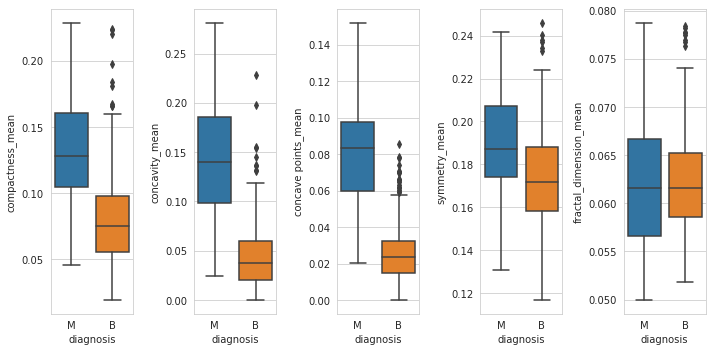

In [ ]:
plt.rcParams['figure.figsize']=(10,5)
f,(ax1,ax2,ax3,ax4,ax5) = plt.subplots(1,5)
sns.boxplot('diagnosis',y='radius_mean',data=df,ax=ax1)
sns.boxplot('diagnosis',y='texture_mean',data=df,ax=ax2)
sns.boxplot('diagnosis',y='perimeter_mean',data=df,ax=ax3)
sns.boxplot('diagnosis',y='area_mean',data=df,ax=ax4)
sns.boxplot('diagnosis',y='smoothness_mean',data=df,ax=ax5)
f.tight_layout()

f,(ax1,ax2,ax3,ax4,ax5) = plt.subplots(1,5)
sns.boxplot('diagnosis',y='compactness_mean',data=df,ax=ax1)
sns.boxplot('diagnosis',y='concavity_mean',data=df,ax=ax2)
sns.boxplot('diagnosis',y='concave points_mean',data=df,ax=ax3)
sns.boxplot('diagnosis',y='symmetry_mean',data=df,ax=ax4)
sns.boxplot('diagnosis',y='fractal_dimension_mean',data=df,ax=ax5)
f.tight_layout()

다중공선성 제거


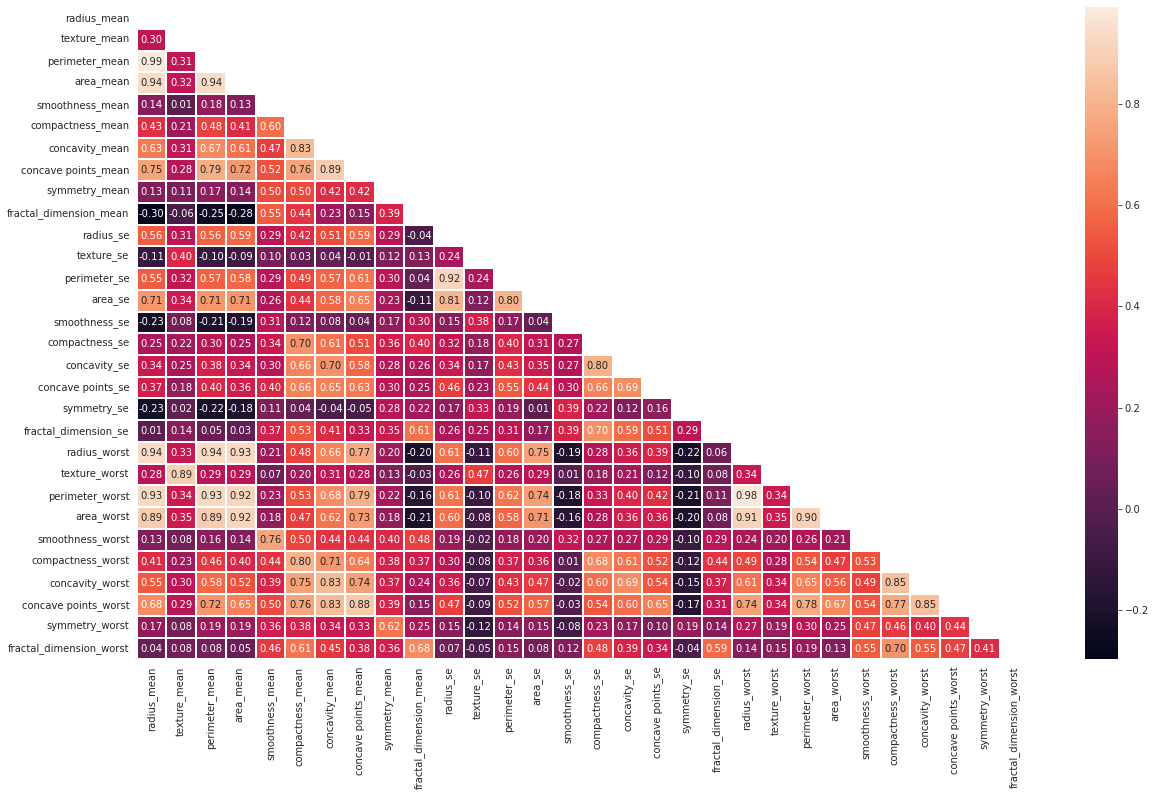

In [ ]:

# heatmap 

plt.figure(figsize = (20, 12))

#상삼각행렬만 출력 
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype = bool)) 


sns.heatmap(corr,  mask = mask, linewidths = 1, annot = True, fmt = ".2f")
plt.show()

In [ ]:
# 너무 높은 상관관계 제거..! 

corr_matrix = df.corr().abs() 


#상삼각행렬만 출력. 
mask = np.triu(np.ones_like(corr_matrix, dtype = bool))
tri_df = corr_matrix.mask(mask)

to_drop = [x for x in tri_df.columns if any(tri_df[x] > 0.92)]

print(to_drop)

df = df.drop(to_drop, axis = 1)

print(f"제거되고 난 칼럼의 개수 : {df.shape[1]}")

[]
제거되고 난 칼럼의 개수 : 27


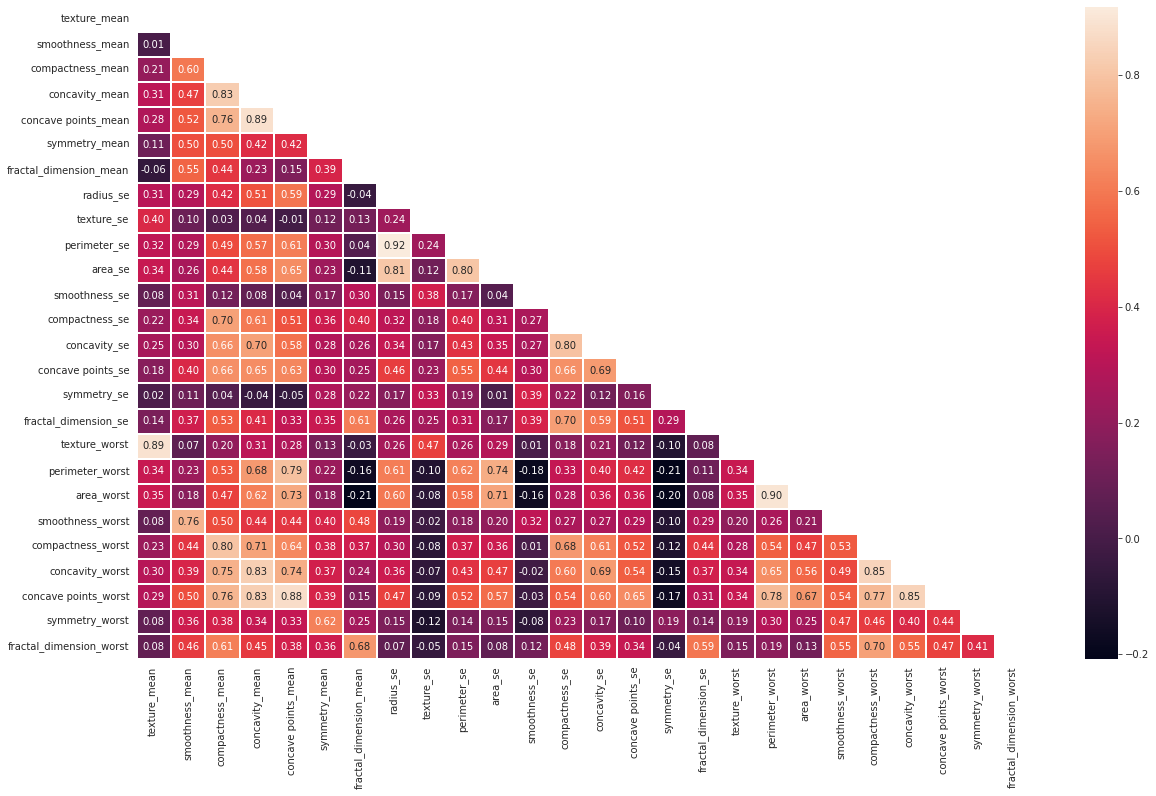

In [ ]:
# heatmap 

plt.figure(figsize = (20, 12))

#상삼각행렬만 출력 
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype = bool)) 


sns.heatmap(corr,  mask = mask, linewidths = 1, annot = True, fmt = ".2f")
plt.show()

In [ ]:
print(df.columns)

Index(['diagnosis', 'texture_mean', 'smoothness_mean', 'compactness_mean',
       'concavity_mean', 'concave points_mean', 'symmetry_mean',
       'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se',
       'area_se', 'smoothness_se', 'compactness_se', 'concavity_se',
       'concave points_se', 'symmetry_se', 'fractal_dimension_se',
       'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


### Split The Data

---

In [ ]:
x = df.drop("diagnosis", axis=1)   # our feautures
y = df.diagnosis  # we dropping the "B" column because we dont need it. If a label is Benign, then "M" column will be              # our label

In [ ]:
# For Diagnosis column, we have to transform benign-malign to 0-1 for better modeling

y = pd.get_dummies(y)
y = y.drop("B", axis=1) 
#y = y.drop("B", axis=1)  # we dropping the "B" column because we dont need it. If a label is Benign, then "M" column will be 0.

In [ ]:
x.head()

,texture_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,10.38,0.11840,0.104341,0.088799,0.14710,0.241900,0.078710,0.405172,0.9053,2.866059,40.337079,0.006399,0.049040,0.05373,0.01587,0.030030,0.006193,17.33,184.60,880.583128,0.162200,0.254265,0.7119,0.2654,0.290076,0.118900
1,17.77,0.08474,0.078640,0.086900,0.07017,0.181200,0.056670,0.543500,0.7339,3.398000,74.080000,0.005225,0.013080,0.01860,0.01340,0.013890,0.003532,23.41,158.80,880.583128,0.123800,0.186600,0.2416,0.1860,0.275000,0.089020
2,21.25,0.10960,0.159900,0.197400,0.12790,0.206900,0.059990,0.745600,0.7869,4.585000,40.337079,0.006150,0.040060,0.03832,0.02058,0.022500,0.004571,25.53,152.50,1709.000000,0.144400,0.424500,0.4504,0.2430,0.361300,0.087580
3,20.38,0.09636,0.104341,0.241400,0.10520,0.181162,0.062798,0.495600,1.1560,3.445000,27.230000,0.009110,0.025478,0.05661,0.01867,0.020542,0.003795,26.50,98.87,567.700000,0.132369,0.254265,0.6869,0.2575,0.290076,0.083946
4,14.34,0.10030,0.132800,0.198000,0.10430,0.180900,0.058830,0.757200,0.7813,5.438000,40.337079,0.011490,0.024610,0.05688,0.01885,0.017560,0.005115,16.67,152.20,1575.000000,0.137400,0.205000,0.4000,0.1625,0.236400,0.076780


In [ ]:
y.head()

,M
0,1
1,1
2,1
3,1
4,1


### Standard Scaler

---

> Standardize features by removing the mean and scaling to unit variance

In [ ]:
scaler = StandardScaler()
x = scaler.fit_transform(x)

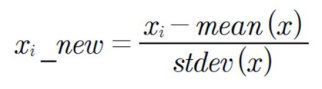

### Train-Test Split

---

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
from imblearn.over_sampling import SMOTE 

smote = SMOTE(random_state=0)
x_train_over,y_train_over = smote.fit_resample(x_train,y_train)
print('SMOTE 적용 전 학습용 피처/레이블 데이터 세트: ', x_train.shape, y_train.shape)
print('SMOTE 적용 후 학습용 피처/레이블 데이터 세트: ', x_train_over.shape, y_train_over.shape)
# print('SMOTE 적용 후 레이블 값 분포: \n', pd.Series(y_train_over).value_counts())

SMOTE 적용 전 학습용 피처/레이블 데이터 세트:  (455, 26) (455, 1)
SMOTE 적용 후 학습용 피처/레이블 데이터 세트:  (572, 26) (572, 1)


In [ ]:
print(f"x_train: {x_train.shape}")
print(f"x_test: {x_test.shape}")
print(f"y_train: {y_train.shape}")
print(f"y_test: {y_test.shape}")

x_train: (455, 26)
x_test: (114, 26)
y_train: (455, 1)
y_test: (114, 1)


In [ ]:
x_train

array([[-0.44748546,  0.80787106,  0.93421322, ...,  0.91959172,
         0.16478572,  2.62350642],
       [ 1.86249044,  1.37976541,  0.10368331, ...,  2.6752184 ,
         2.7346837 ,  0.16494441],
       [-1.31497641, -1.43319225, -0.2745366 , ..., -0.97048581,
         0.98313076,  0.23485872],
       ...,
       [-0.57498413, -2.41837559, -1.63991379, ..., -1.23756033,
        -0.78559427, -1.50167351],
       [ 0.12500856,  0.76211952,  0.30500714, ...,  1.03683652,
         0.76204013,  1.7442496 ],
       [ 0.35000622, -1.21053472, -1.33362526, ..., -0.61357437,
        -0.27901768, -0.94627628]])

# Modeling

---

In [ ]:
algorithms = [LogisticRegression, 
              LinearSVC, 
              RandomForestClassifier,
              KNeighborsClassifier,
              DecisionTreeClassifier,
              AdaBoostClassifier,
              GradientBoostingClassifier,
              LGBMClassifier,
              XGBClassifier,
             ]

             


In [ ]:
 df_algorithms = pd.DataFrame(columns=["Model", "Train Accuracy", "Test Accuracy"])

In [ ]:
def autoML(algorithm): 

    model = algorithm().fit(x_train, y_train)
    train_acc = model.score(x_train, y_train)
    model_name = algorithm.__name__
    
    y_pred = model.predict(x_test)
    test_acc = accuracy_score(y_test, y_pred)
    
    return model_name, train_acc, test_acc

In [ ]:
for alg in algorithms:
    
    model_name, train_acc, test_acc = autoML(alg)
    
    df_algorithms = df_algorithms.append({"Model" : model_name,
                                          "Train Accuracy": train_acc,
                                          "Test Accuracy": test_acc}, ignore_index=True)

In [ ]:
df_algorithms.sort_values(by=["Test Accuracy", "Train Accuracy"], ascending = False)

,Model,Train Accuracy,Test Accuracy
1,LinearSVC,0.978022,0.982456
0,LogisticRegression,0.971429,0.982456
2,RandomForestClassifier,1.000000,0.964912
7,LGBMClassifier,1.000000,0.964912
8,XGBClassifier,1.000000,0.964912
5,AdaBoostClassifier,1.000000,0.956140
6,GradientBoostingClassifier,1.000000,0.956140
3,KNeighborsClassifier,0.980220,0.956140
4,DecisionTreeClassifier,1.000000,0.929825


# Tuning

---

In [ ]:
model = LinearSVC()
# model = LogisticRegression()

In [ ]:
parameters = {"penalty": ["l1","l2"],
              "loss": ["hinge", "squared_hinge"], 
              "C": [0.001, 0.01, 0.1, 1, 10],
              "multi_class": ["ovr", "crammer_singer"], 
              }

In [ ]:
cv_model = GridSearchCV(model, 
                        parameters, 
                        cv=5
                       ).fit(x_train, y_train)

In [ ]:
cv_model.best_params_

{'C': 0.01, 'loss': 'hinge', 'multi_class': 'crammer_singer', 'penalty': 'l1'}

In [ ]:
tuned_model = LinearSVC(C = 0.01, 
                        loss = "hinge",
                        multi_class = "crammer_singer", 
                        penalty = "l1"

                        ).fit(x_train, y_train)

In [ ]:
y_pred = tuned_model.predict(x_test)
accuracy_score(y_test, y_pred)

0.9912280701754386

In [ ]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99        72
           1       0.98      1.00      0.99        42

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



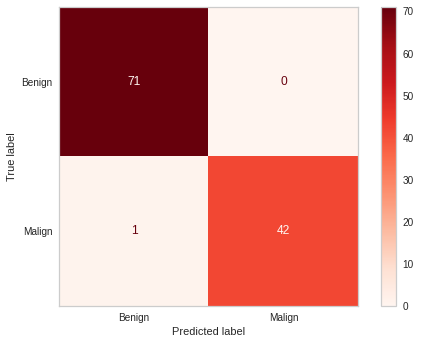

In [ ]:
plot_confusion_matrix(tuned_model,
                      x_test,
                      y_test,
                      display_labels=["Benign", "Malign"],
                      cmap=plt.cm.Reds)
plt.grid(False)

# Keras

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils.vis_utils import plot_model


In [ ]:
print(f"x_train: {x_train.shape}")
print(f"x_test: {x_test.shape}")
print(f"y_train: {y_train.shape}")
print(f"y_test: {y_test.shape}")

x_train: (455, 26)
x_test: (114, 26)
y_train: (455, 1)
y_test: (114, 1)


In [ ]:
print('Shape of the training set:'+" "+str(x_train.shape))
print('Size of the training set:'+" "+str(x_train.shape[0]))

print('Shape of the testing set:'+" "+str(x_test.shape))
print('Size of the testing set:'+" "+str(x_test.shape[0]))

Shape of the training set: (455, 26)
Size of the training set: 455
Shape of the testing set: (114, 26)
Size of the testing set: 114


In [ ]:
model = Sequential([
    Dense(8 , input_dim =26,  activation='relu'),
    Dense(8 ,activation='relu'),
    Dense(1,activation='sigmoid') #이진분류, 시그모이드 사용 
])

#레이어를 선형으로 연결해서 구성하는 sequntial 
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 8)                 216       
                                                                 
 dense_4 (Dense)             (None, 8)                 72        
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 297
Trainable params: 297
Non-trainable params: 0
_________________________________________________________________


In [ ]:
keras.utils.plot_model(model, 'my_first_model.png')

AttributeError: ignored

In [ ]:

model.compile(optimizer='sgd',
             loss='binary_crossentropy',
              metrics=['accuracy'])


# #For a binary classification problem
# model.compile(optimizer='rmsprop',
#               loss='binary_crossentropy',
#               metrics=['accuracy'])

history = model.fit(x_train, y_train, validation_data = (x_test,y_test), epochs=50, batch_size=30)
model.fit(x_train, y_train, epochs=50, batch_size=30)
model.save('model_breast_cancer.h5')

Epoch 1/50
16/16 [==============================] - 1s 14ms/step - loss: 0.8373 - accuracy: 0.3956 - val_loss: 0.7414 - val_accuracy: 0.4737
Epoch 2/50
16/16 [==============================] - 0s 4ms/step - loss: 0.7233 - accuracy: 0.5275 - val_loss: 0.6552 - val_accuracy: 0.6316
Epoch 3/50
16/16 [==============================] - 0s 4ms/step - loss: 0.6444 - accuracy: 0.6835 - val_loss: 0.5880 - val_accuracy: 0.7632
Epoch 4/50
16/16 [==============================] - 0s 4ms/step - loss: 0.5815 - accuracy: 0.7648 - val_loss: 0.5270 - val_accuracy: 0.8158
Epoch 5/50
16/16 [==============================] - 0s 3ms/step - loss: 0.5300 - accuracy: 0.7934 - val_loss: 0.4780 - val_accuracy: 0.8509
Epoch 6/50
16/16 [==============================] - 0s 3ms/step - loss: 0.4886 - accuracy: 0.8286 - val_loss: 0.4360 - val_accuracy: 0.8772
Epoch 7/50
16/16 [==============================] - 0s 3ms/step - loss: 0.4521 - accuracy: 0.8505 - val_loss: 0.3999 - val_accuracy: 0.9035
Epoch 8/50
16/16 [=

In [ ]:
pretrained_model = keras.models.load_model('./model_breast_cancer.h5')
eval_score = pretrained_model.evaluate(x_test,y_test)
print('The loss of the evaluation :'+' '+str(eval_score[0]))
print('The accuracy of the evaluation :'+' '+str(eval_score[1]))

4/4 [==============================] - 0s 5ms/step - loss: 0.0636 - accuracy: 0.9912
The loss of the evaluation : 0.06356540322303772
The accuracy of the evaluation : 0.9912280440330505


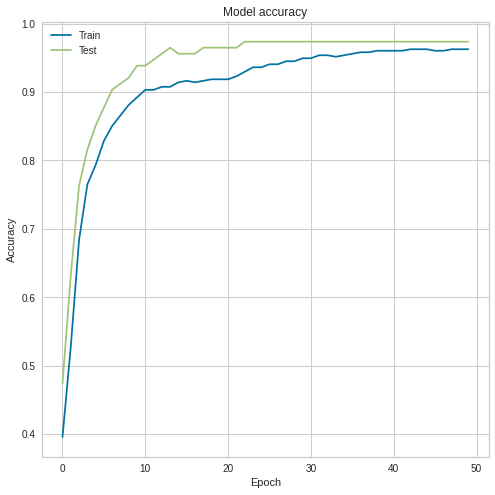

In [ ]:
plt.figure(figsize=(8, 8))

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.rcParams['lines.linewidth'] = 2
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


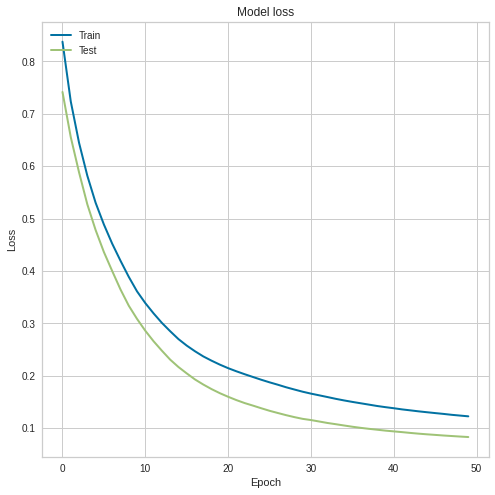

In [ ]:
plt.figure(figsize=(8, 8))

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss']) 
plt.rcParams['lines.linewidth'] = 2
plt.title('Model loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper left') 
plt.show()

In [ ]:
!pip install pycaret

In [ ]:
from pycaret.classification import *

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/ML219/wisconsin_data.csv')

In [ ]:
from pycaret.classification import *

model = setup(
    data=data,
    train_size = 0.8,
    target = 'diagnosis',
    
    session_id = 2021
)

,Description,Value
0,session_id,2021
1,Target,diagnosis
2,Target Type,Binary
3,Label Encoded,"B: 0, M: 1"
4,Original Data,"(569, 33)"
5,Missing Values,True
6,Numeric Features,31
7,Categorical Features,1
8,Ordinal Features,False
9,High Cardinality Features,False


In [ ]:
best3models = compare_models(sort='Accuracy', n_select=3, fold=2, verbose = True)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
qda,Quadratic Discriminant Analysis,0.9582,0.9820,0.9471,0.9415,0.9443,0.9109,0.9109,0.025
ridge,Ridge Classifier,0.9561,0.0000,0.8882,0.9936,0.9378,0.9040,0.9076,0.020
lda,Linear Discriminant Analysis,0.9560,0.9811,0.9000,0.9808,0.9386,0.9045,0.9066,0.025
et,Extra Trees Classifier,0.9538,0.9910,0.9118,0.9627,0.9365,0.9003,0.9012,0.465
rf,Random Forest Classifier,0.9494,0.9866,0.9176,0.9463,0.9311,0.8912,0.8922,0.515
ada,Ada Boost Classifier,0.9494,0.9825,0.9059,0.9566,0.9305,0.8908,0.8917,0.140
gbc,Gradient Boosting Classifier,0.9450,0.9802,0.9059,0.9445,0.9246,0.8814,0.8821,0.195
lightgbm,Light Gradient Boosting Machine,0.9428,0.9840,0.8882,0.9559,0.9202,0.8758,0.8779,0.240
dt,Decision Tree Classifier,0.9362,0.9254,0.8824,0.9436,0.9108,0.8614,0.8637,0.025
knn,K Neighbors Classifier,0.6967,0.7252,0.4706,0.6250,0.5369,0.3180,0.3251,0.125


In [ ]:
qda = create_model('qda', fold=5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9451,0.9912,0.9118,0.9394,0.9254,0.8819,0.8822
1,0.9670,0.9985,0.9706,0.9429,0.9565,0.9300,0.9302
2,0.9670,0.9923,0.9118,1.0000,0.9538,0.9283,0.9307
3,0.9231,0.9760,0.9412,0.8649,0.9014,0.8385,0.8405
4,0.9780,0.9917,0.9706,0.9706,0.9706,0.9530,0.9530
Mean,0.9560,0.9899,0.9412,0.9435,0.9415,0.9064,0.9073
SD,0.0197,0.0074,0.0263,0.0450,0.0249,0.0410,0.0406


In [ ]:
tuned_qda  = tune_model(qda,fold=2, optimize='Accuracy')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9605,0.9752,0.9529,0.9419,0.9474,0.9158,0.9158
1,0.9559,0.9889,0.9412,0.9412,0.9412,0.9060,0.9060
Mean,0.9582,0.9820,0.9471,0.9415,0.9443,0.9109,0.9109
SD,0.0023,0.0069,0.0059,0.0003,0.0031,0.0049,0.0049


In [ ]:
pred= predict_model(tuned_qda)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Quadratic Discriminant Analysis,0.9386,0.9891,0.9524,0.8889,0.9195,0.87,0.8713


In [ ]:
evaluate_model(tuned_qda)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [ ]:
qda_final = finalize_model(tuned_qda)
predict_model(qda_final, data)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32,Label,Score
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN,M,1.0
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN,M,1.0
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN,M,1.0
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN,M,1.0
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN,M,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN,M,1.0
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN,M,1.0
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN,M,1.0
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN,M,1.0
